In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import face_recognition
%matplotlib inline

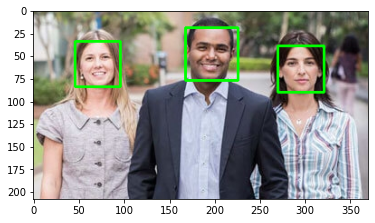

In [5]:
# Given an image, lets detect faces on the image using haar cascades
people = cv2.imread('img/people2.jpg');

# Convert the image to grayscale
people_gray = cv2.cvtColor(people, cv2.COLOR_BGR2GRAY)
# Create a CascadeClassifier using the frontalFace classifier -> Haarcascades/haarcascade_frontalface_default.xml
face_classifier = cv2.CascadeClassifier("./Haarcascades/haarcascade_frontalface_default.xml")

# Using the classifiers detect all faces on the image
faces = face_classifier.detectMultiScale(people_gray, minNeighbors=4)

# If no faces detected print("No faces found")
if faces is ():
    print("No faces found")

# Otherwise draw a rectangle on each face that has been detected
for (x,y,w,h) in faces:
    cv2.rectangle(people, (x,y), (x+w, y+h), (0,255,0), 2)

plt.imshow(cv2.cvtColor(people, cv2.COLOR_BGR2RGB));

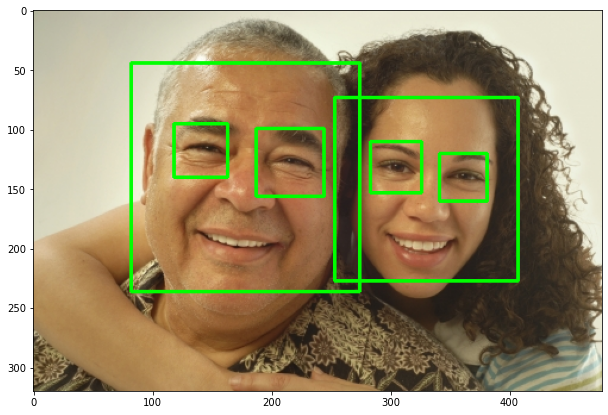

In [4]:
# Detect faces but this time also detect eyes in the faces using -> Haarcascades/haarcascade_eye.xml
image = cv2.imread("./img/2_people.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_classifier = cv2.CascadeClassifier("./Haarcascades/haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("./Haarcascades/haarcascade_eye.xml")
faces = face_classifier.detectMultiScale(image_gray, minNeighbors=4)

if faces is ():
    print("No faces found")
idx = 0
for (x,y,w,h) in faces:
    idx += 1
    face = image_gray[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(face)
    if eyes is ():
        print("No eyes found")
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(image, (x+ex,y+ey), (x+ex+ew, y+ey+eh), (0,255,0), 2)

    cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
plt.figure(figsize=(20,7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

# Encapsulate all the logic to detect faces and eyes in a function and apply it to live video using you webcam

## 1. A face detector using CascadeClassifiers

In [ ]:
def face_detector(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    face_classifier = cv2.CascadeClassifier("./Haarcascades/haarcascade_frontalface_default.xml")
    eye_classifier = cv2.CascadeClassifier("./Haarcascades/haarcascade_eye.xml")
    faces = face_classifier.detectMultiScale(image_gray, minNeighbors=40)

    if faces is ():
        print("No faces found")
    idx = 0
    for (x,y,w,h) in faces:
        idx += 1
        face = image_gray[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(face, minNeighbors=20)
        if eyes is ():
            print("No eyes found")
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(image, (x+ex,y+ey), (x+ex+ew, y+ey+eh), (0,255,0), 2)

        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
    return image

# load the webcam video and call the detector function
video = cv2.VideoCapture(0) 

while(video.isOpened()):
    ret, image = video.read()
    if ret is not None:
        image = face_detector(image)

        cv2.imshow("Face Detector", image)

        if cv2.waitKey(30) & 0xFF == ord('q'):
                break
    else:
        break

video.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

![face_and_eye_detector](./img/gif/FaceDetector.gif "face and eye detector")

## 2. A face detector using the python library face-detector

In [ ]:
# Encapsulate all the logic to detect faces and eyes in a function and apply it to live video using you webcam
def face_detector(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    eye_classifier = cv2.CascadeClassifier("./Haarcascades/haarcascade_eye.xml")   
    faces = face_recognition.face_locations(image)

    if faces is ():
        print("No faces found")
    idx = 0
    for (top, right, bottom, left) in faces:
        idx += 1
        face = image[top:bottom, left:right]
        eyes = eye_classifier.detectMultiScale(face, minNeighbors=20)
        if eyes is ():
            print("No eyes found")
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(image, (left+ex,top+ey), (left+ex+ew, top+ey+eh), (0,255,0), 2)

        cv2.rectangle(image, (left,top), (right, bottom), (0,255,0), 2)
    return image

# load the webcam video and call the detector function
video = cv2.VideoCapture(0) 

while(video.isOpened()):
    ret, image = video.read()
    if ret is not None:
        image = face_detector(image)

        cv2.imshow("Face Detector", image)

        if cv2.waitKey(30) & 0xFF == ord('q'):
                break
    else:
        break

video.release()
cv2.destroyAllWindows()
cv2.waitKey(1)